1.	Point Density and Resolution
o	Definition: Density of points per area/volume and detail level.
o	Method: Use KD-tree for nearest neighbors, calculate average nearest distances.
o	Visualization: Histograms, scatter plots.


In [ ]:
import numpy as np
import trimesh
from scipy.spatial import ConvexHull, KDTree
import matplotlib.pyplot as plt

def load_model(file_path, file_type):
    """Load vertices from a 3D file using trimesh."""
    mesh = trimesh.load(file_path, file_type=file_type)
    return mesh.vertices

def calculate_convex_hull_volume(points):
    """Calculate the volume of the convex hull enclosing a set of 3D points."""
    hull = ConvexHull(points)
    return hull.volume

def calculate_point_density(points, volume):
    """Calculate the point density given a list of points and a volume."""
    num_points = len(points)
    return num_points / volume

def calculate_average_distance(points, k=5):
    """Calculate the average distance to the k nearest neighbors for each point."""
    tree = KDTree(points)
    distances, _ = tree.query(points, k=k+1)  # +1 to include the point itself
    mean_distances = np.mean(distances[:, 1:], axis=1)  # Exclude self-distance
    return np.mean(mean_distances)

# Define paths and model names
model_paths = {
    'Natural': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Nature/3DGS.ply'
    },
    'Accidental': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Accident/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Accident/3DGS.ply'
    },
    'Homicidal': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Homicide/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Homicide/3DGS.ply'
    },
    'Suicidal': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Suicide/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Suicide/3DGS.ply'
    },
    'Undetermined': {
        'lidar': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/LiDARPLY/AdvancedExport/3DModel.ply',
        'gaussian': '/Users/aaeshahalhakamy/MyResearch/Crime CV/Scenes/Undetermined/3DGS.ply'
    }
}

# Initialize lists for plotting
model_names = list(model_paths.keys())
lidar_densities = []
gaussian_densities = []
lidar_resolutions = []
gaussian_resolutions = []

# Calculate densities and resolutions
for model_name in model_names:
    paths = model_paths[model_name]
    # LiDAR Calculations
    points_lidar = load_model(paths['lidar'], 'ply')
    volume_lidar = calculate_convex_hull_volume(points_lidar)
    density_lidar = calculate_point_density(points_lidar, volume_lidar)
    resolution_lidar = calculate_average_distance(points_lidar)
    
    lidar_densities.append(density_lidar)
    lidar_resolutions.append(resolution_lidar)
    
    # Gaussian Calculations
    points_gaussian = load_model(paths['gaussian'], 'ply')
    volume_gaussian = calculate_convex_hull_volume(points_gaussian)
    density_gaussian = calculate_point_density(points_gaussian, volume_gaussian)
    resolution_gaussian = calculate_average_distance(points_gaussian)
    
    gaussian_densities.append(density_gaussian)
    gaussian_resolutions.append(resolution_gaussian)
    # Print the results
    print(f"{model_name} - LiDAR Density: {density_lidar:.4f}, Gaussian Density: {density_gaussian:.4f}")
    print(f"{model_name} - LiDAR Resolution: {resolution_lidar:.4f}, Gaussian Resolution: {resolution_gaussian:.4f}\n")


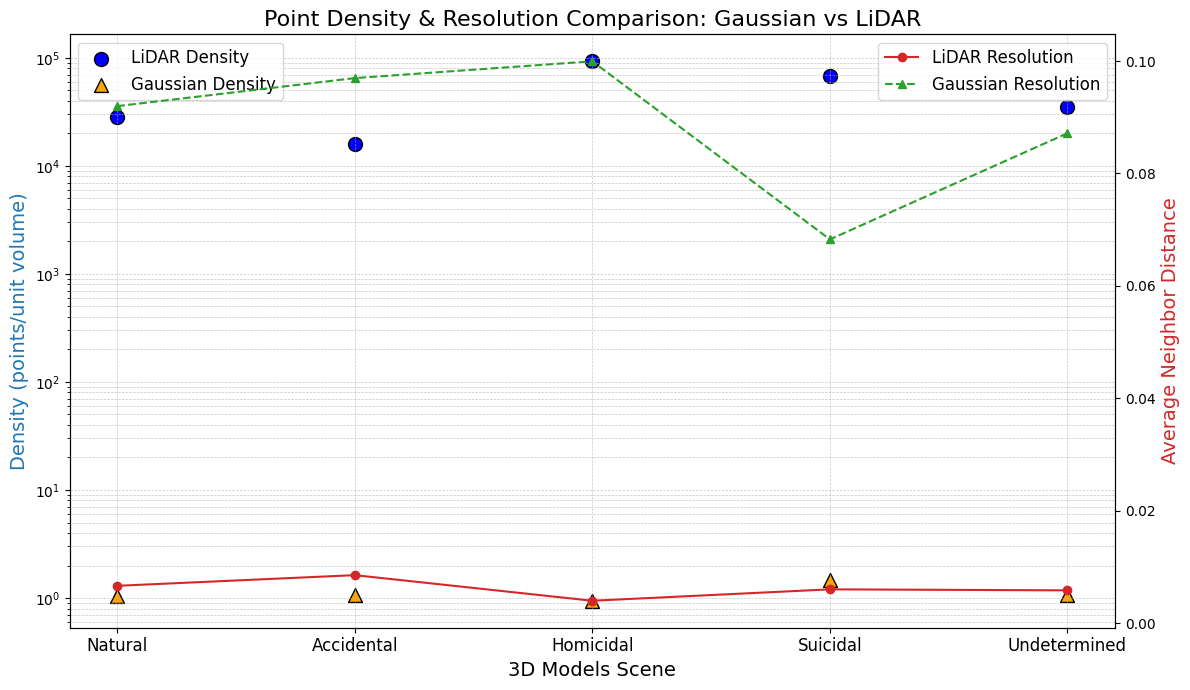

In [8]:
# Plotting
x = np.arange(len(model_names))
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Point Densities
ax1.set_xlabel('3D Models Scene', fontsize=14)
ax1.set_ylabel('Density (points/unit volume)', color='tab:blue', fontsize=14)
ax1.scatter(x, lidar_densities, marker='o', color='blue', label='LiDAR Density', s=100, edgecolor='black')
ax1.scatter(x, gaussian_densities, marker='^', color='orange', label='Gaussian Density', s=100, edgecolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, fontsize=12)
ax1.set_yscale('log')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Instantiate a second y-axis for resolution
ax2 = ax1.twinx()
ax2.set_ylabel('Average Neighbor Distance', color='tab:red', fontsize=14)
ax2.plot(x, lidar_resolutions, marker='o', linestyle='-', color='tab:red', label='LiDAR Resolution')
ax2.plot(x, gaussian_resolutions, marker='^', linestyle='--', color='tab:green', label='Gaussian Resolution')

ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

ax1.set_title('Point Density & Resolution Comparison: Gaussian vs LiDAR', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('Images/B1.png', dpi=200)